In [9]:
#  This file demonstrates how to create plots in Julia by using the PyPlot package
#
#
#  PyPlot relies on the matplotlib library, which is part of Python. If you have
#  Python installed, then it will be used as is. Otherwise, see PyPlot's homepage
#  https://github.com/stevengj/PyPlot.jl
#  for instruction on how to install what is needed.
#
#  A nice collection examples are available at
#  https://gist.github.com/gizmaa/7214002
#
#  Notice: Restart Julia before running this file (at least if you have used
#          another plotting package)
#
#  Paul Söderlind (Paul.Soderlind at unisg.ch)
#------------------------------------------------------------------------------

In [10]:
using PyPlot       #the first time, do Pkg.add("PyPlot") to install the package

# A First Plot

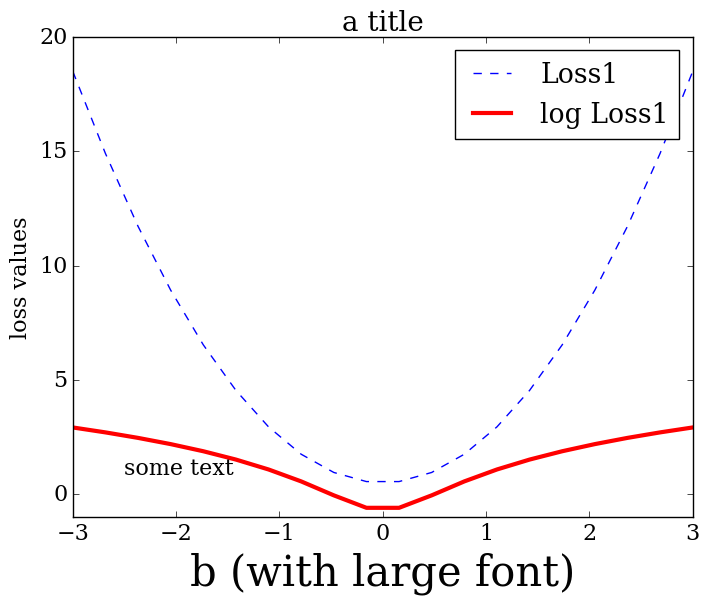

In [11]:
b = linspace(-3,3,20)                 #create some "data" to plot
c = linspace(1,7,25)'

loss1 = 2*b.^2 + 0.5
loss2 = fill(NaN,(length(b),length(c)))  #to put results in, initialized as NaNs
for j = 1:length(c)                      #create loss2 column by column
  loss2[:,j] = 2*b.^2 + (c[j]-4)^2 - 0.0*b.*(c[j]-4)
end


t = collect(-3:6/99:6)           #A FIRST PLOT

PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(8,6))
  plot(b,loss1,linestyle="--",color="b",linewidth=1.0)
  plot(b,log(loss1),linestyle="-",color="r",linewidth=3.0)
  title("a title",fontsize=20)
  xlim(-3,3)               # set limits of the x-axis
  ylim(-1,20)              # set limits of the y-axis
  xlabel("b (with large font)",fontsize=30)
  ylabel("loss values")
  text(-2.5,0.9,"some text")
  legend(["Loss1";"log Loss1"])
  savefig("MorePlots1.pdf")      #save pdf file of the plot

# Subplots

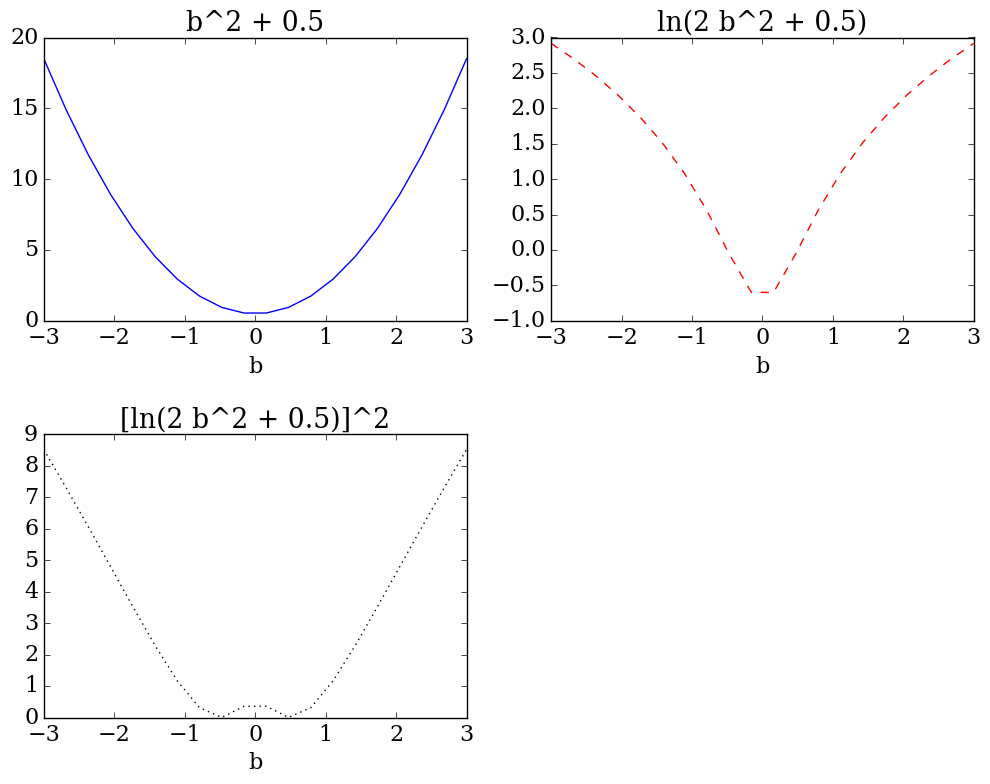

PyObject <matplotlib.text.Text object at 0x00000000201804A8>

In [12]:
PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(12,8.5))                      #subplots
subplots_adjust(hspace = 0.4)
subplot(221)
  plot(b,loss1,"b-")
  title("b^2 + 0.5")
  xlabel("b")
subplot(222)
  plot(b,log(loss1),"r--")
  title("ln(2 b^2 + 0.5)")
  xlabel("b")
subplot(223)
  plot(b,log(loss1).^2,"k:")
  title("[ln(2 b^2 + 0.5)]^2")
  xlabel("b")

# Bars, Stairs and Surface

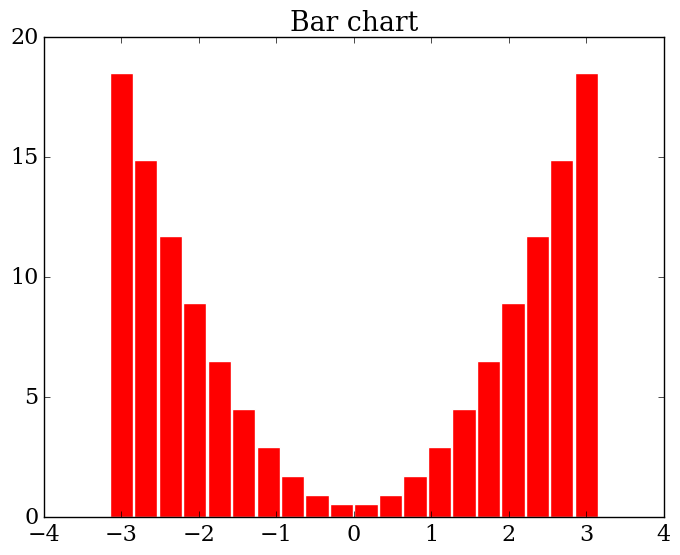

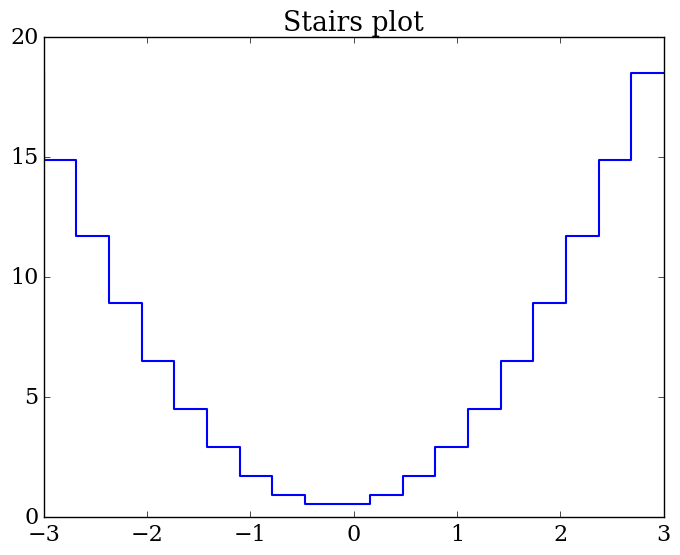

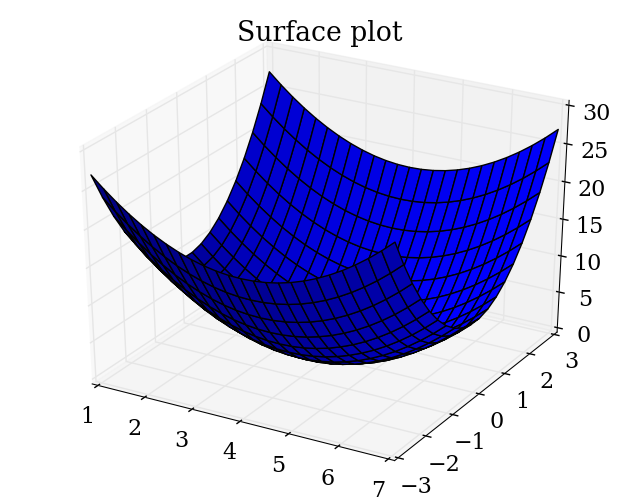

PyObject <matplotlib.text.Text object at 0x0000000022178D30>

In [13]:
PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(8,6))        #BAR, STEP, SURFACE
  bar(b,loss1,facecolor="red",edgecolor="white",align="center",width=0.3)
  title("Bar chart")

PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(8,6))
  step(b,loss1,linewidth=1.5)
  title("Stairs plot")

PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(8,6))
  surf(c,b,loss2,rstride=1,cstride=1)    #rstride and cstride improves the look
  xlim(1,7)                              #try other numbers
  ylim(-3,3)
  zlim(0,30)
  title("Surface plot")

# Scatter and Histogram

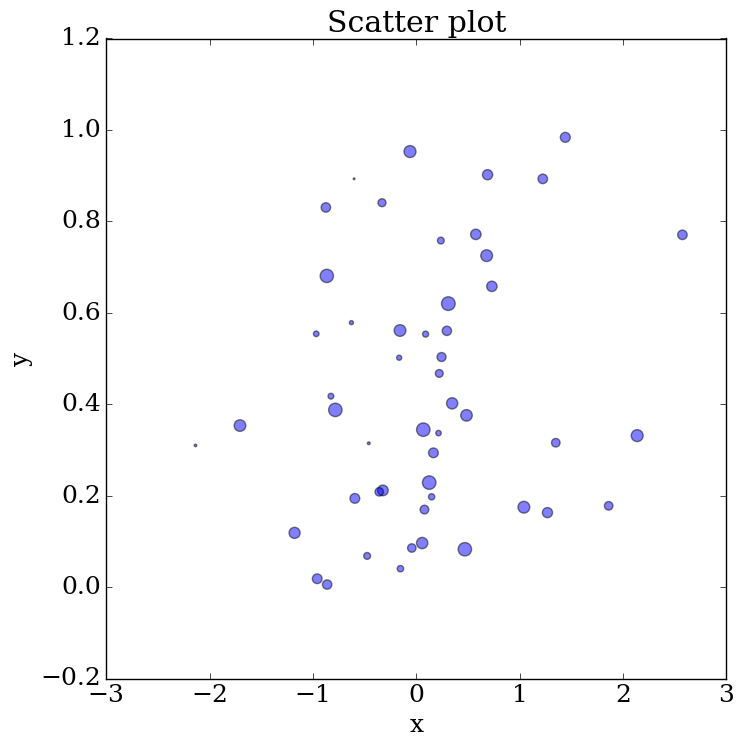

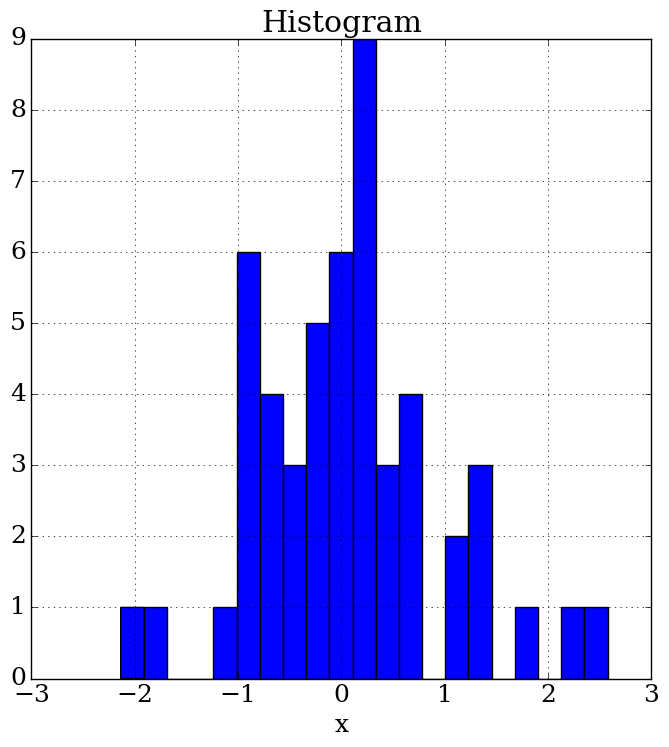

PyObject <matplotlib.text.Text object at 0x00000000216BC668>

In [14]:
N = 51
x = randn(N,1)                         #SCATTER, HISTOGRAM
y = rand(N,1)
areas = rand(51)*100                   #size of the scatter points

PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(8,8))
  scatter(x,y,s=areas,alpha=0.5)
  title("Scatter plot")
  xlabel("x")
  ylabel("y")

PyPlot.matplotlib[:rc]("font",size=18)
figure(figsize=(8,8))
  PyPlot.plt[:hist](x,21)            #long name to avoid naming conflict
  grid("on")
  title("Histogram")
  xlabel("x")

# Time Series Plot

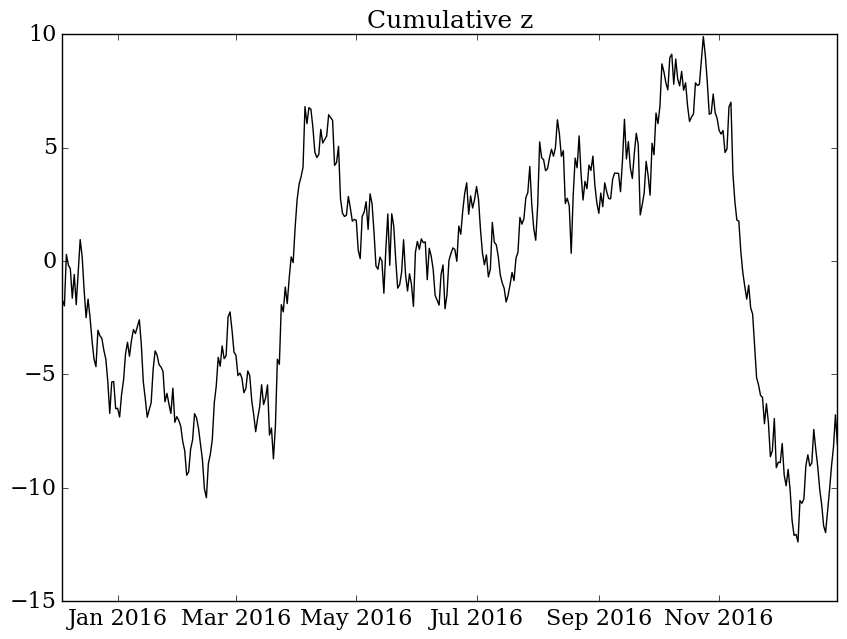

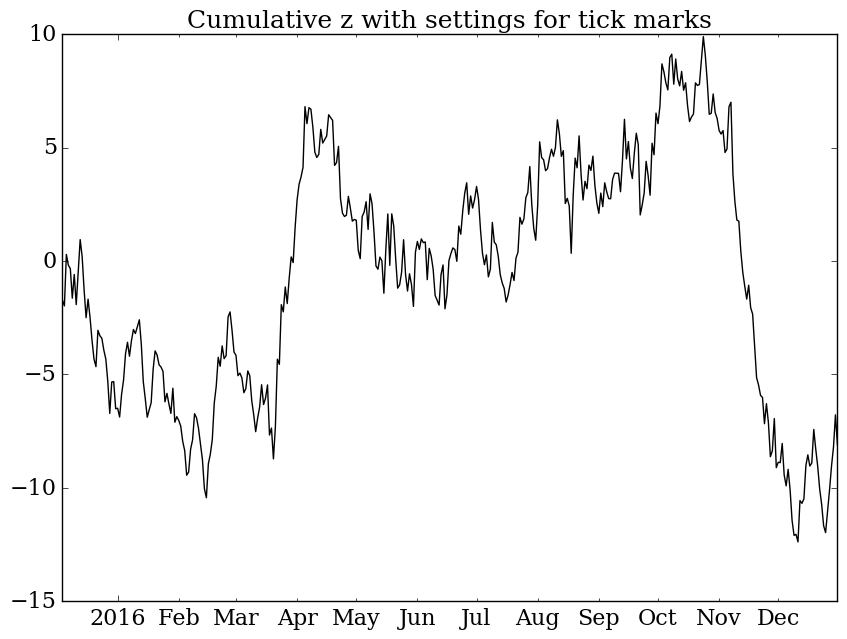

In [15]:
dN = Date(2015,12,4):Dates.Day(1):Date(2016,12,31)   #just faking some dates
dN = collect(dN)                                     #to a vector
z  = randn(length(dN),1)                             #some random numbers to plot 

PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(10,10/1.41))          #basic time series plot
  plot_date(dN,cumsum(z),"k-")
  title("Cumulative z",fontsize=18)


PyPlot.matplotlib[:rc]("font",size=16)
figure(figsize=(10,10/1.41))          #control tick marks
ax1 = axes()
  plot_date(dN,cumsum(z),"k-")
  title("Cumulative z with settings for tick marks",fontsize=18)
  majorlocator = matplotlib[:dates][:YearLocator]()
  majorformatter = matplotlib[:dates][:DateFormatter]("%Y")
  minorlocator = matplotlib[:dates][:MonthLocator](bymonth=2:13,bymonthday=1,interval=1)
  minorformatter = matplotlib[:dates][:DateFormatter]("%b")
  ax1[:xaxis][:set_major_locator](majorlocator)
  ax1[:xaxis][:set_major_formatter](majorformatter)
  ax1[:xaxis][:set_minor_locator](minorlocator)
  ax1[:xaxis][:set_minor_formatter](minorformatter)

# LaTeX in the Figure

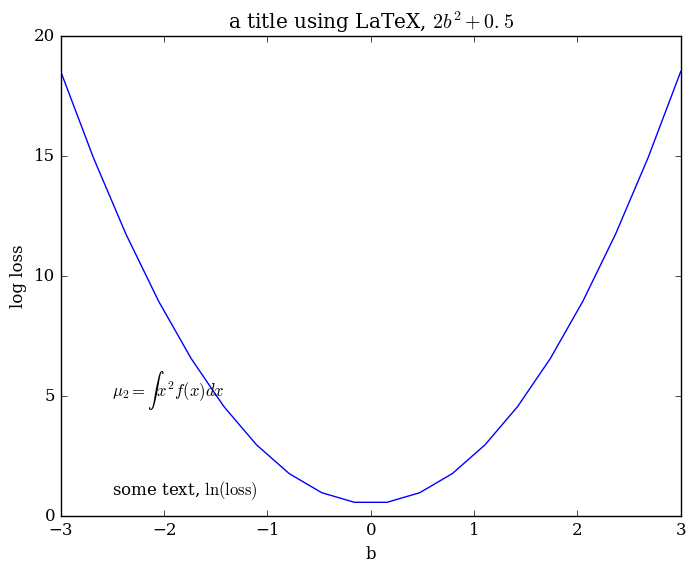

PyObject <matplotlib.text.Text object at 0x000000002280FBE0>

In [16]:
using LaTeXStrings                 #add some LaTeX to the figure

t = collect(-3:6/99:6)

PyPlot.matplotlib[:rc]("font",family="serif",size=12)  #font similar to LaTeX
figure(figsize=(8,6))
  plot(b,loss1)
  title(L"a title using LaTeX, $2 b^2 + 0.5$")
  xlabel("b")
  ylabel("log loss")
  text(-2.5,0.9,L"some text, $\ln(\mathrm{loss})$")
  text(-2.5,5,L"$\mu_2 = \int x^2 f(x) dx$")